In [ ]:
import pandas as pd
import imblearn
from collections import Counter
data = pd.read_csv('new_dataset_with_label.csv',index_col=0)

In [ ]:
data.iloc[:2339,:-1]

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
Student,,,,,,,,,,,,,,
A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441
A2016\student1016,37440.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0,0.000000,NaN,NaN,NaN,NaN
A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455
A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774
A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2016\student9946,2989136.0,311.0,127.0,220.0,335.0,15501.0,12362.0,13196.0,1776.0,0.017313,9610.0,315.0,1.522727,5.385016
B2016\student9949,7787496.0,1961.0,1199.0,588.0,468.0,39601.0,9607.0,30431.0,3452.0,0.002364,3735.0,347.0,0.795918,4.929317
B2016\student9972,12352640.0,5669.0,3568.0,973.0,612.0,55655.0,20719.0,47870.0,3707.0,0.004338,11067.0,232.0,0.628983,4.842414


In [ ]:
data.fillna(0, inplace=True)
data["Label"] =data["Label"].astype("int64")
x = data.iloc[:2339,:-1]
y = data.iloc[:2339,-1]

C:\Users\Keerthana\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Not plagiarised'), Text(1, 0, 'plagiarised')]

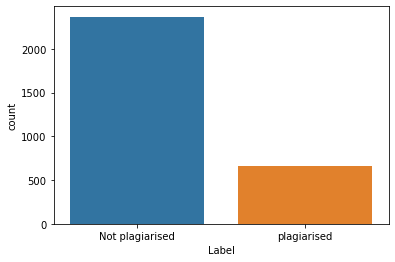

In [ ]:
import seaborn as sns
g = sns.countplot(data['Label'])
g.set_xticklabels(['Not plagiarised','plagiarised'])

In [ ]:
len(x)

2339

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train,Y_train)

In [ ]:
smote_enn = imblearn.combine.SMOTEENN(random_state=0,sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train,Y_train)
print(sorted(Counter(y_train_resampled).items()))

[(0, 621), (1, 645)]


In [ ]:
x_train_resampled

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
0,2.649600e+05,0.000000,0.000000,0.000000,0.000000,150.000000,641.000000,0.000000,0.000000,0.005956,632.000000,3.000000,0.000000,2.496835
1,5.889600e+05,6.000000,3.000000,4.000000,0.000000,7.000000,15.000000,3.000000,0.000000,0.000022,10.000000,2.000000,0.000000,1.300000
2,6.400000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,6.672000e+04,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6.043280e+05,0.000000,0.000000,0.000000,0.000000,602.000000,424.000000,0.000000,0.000000,0.001989,406.000000,37.000000,0.000000,2.960591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1.086854e+07,2793.963092,1595.732651,728.707856,894.033038,59780.625199,21368.790285,51245.032535,3132.115183,0.005738,10164.703777,1317.724228,1.017061,6.216846
1262,1.345834e+07,2851.774677,1918.819003,1067.792432,1534.012975,61141.368390,30186.567388,52328.794328,4913.042774,0.007000,18857.161968,1107.835206,1.438307,4.988809
1263,6.950080e+06,1929.692838,1320.082148,711.836324,607.568842,39720.375241,14404.207531,33709.602732,2200.973699,0.003929,6144.458227,166.139542,0.822783,4.124963
1264,1.447916e+07,3563.202127,2540.530900,1292.030193,881.765591,75846.788824,81370.166060,64157.544299,6122.618742,0.019914,64733.536792,171.104087,0.692830,4.447434


In [ ]:
y_train_resampled


0       0
1       0
2       0
3       0
4       0
       ..
1261    1
1262    1
1263    1
1264    1
1265    1
Name: Label, Length: 1266, dtype: int64

In [ ]:
from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train,Y_train)
print(bnb.score(X_test, Y_test))
y_pred = bnb.predict(X_test)

0.5705128205128205


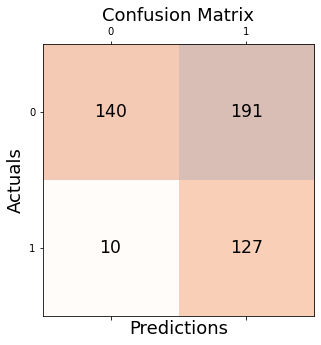

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=bnb.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.399


In [ ]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.927


In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.571


In [ ]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

F1 Score: 0.558


In [ ]:
binary_features=['compiled','compiled successfully','ran_tests','modified','add_lines','change','remove_lines','paste_lines']
df=data.copy(deep=True)
df=data.iloc[:2339,:]
df

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste,Label
Student,,,,,,,,,,,,,,,
A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441,0
A2016\student1016,37440.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.000000,0.0,0.0,0.000000,0.000000,0
A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455,1
A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774,1
A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2016\student9946,2989136.0,311.0,127.0,220.0,335.0,15501.0,12362.0,13196.0,1776.0,0.017313,9610.0,315.0,1.522727,5.385016,0
B2016\student9949,7787496.0,1961.0,1199.0,588.0,468.0,39601.0,9607.0,30431.0,3452.0,0.002364,3735.0,347.0,0.795918,4.929317,0
B2016\student9972,12352640.0,5669.0,3568.0,973.0,612.0,55655.0,20719.0,47870.0,3707.0,0.004338,11067.0,232.0,0.628983,4.842414,0


In [ ]:
all_f=df.columns
remove_features = set(all_f).difference(set(binary_features))
remove_features.remove("Label")

In [ ]:
df=df.drop(list(remove_features), axis = 1)

In [ ]:
df=df.fillna(0)
df["Label"] =df["Label"].astype("int64")
x = df.iloc[:2339,:-1]
y = df.iloc[:2339,-1]

In [ ]:
x

,compiled,compiled successfully,ran_tests,modified,add_lines,change,remove_lines,paste_lines
Student,,,,,,,,
A2016\student1013,1441.0,1116.0,689.0,38441.0,12365.0,32597.0,2023.0,5202.0
A2016\student1016,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0
A2016\student1021,2108.0,1278.0,787.0,58550.0,19160.0,49003.0,6105.0,7270.0
A2016\student1029,1775.0,1201.0,852.0,36461.0,15605.0,30332.0,2683.0,7235.0
A2016\student1066,338.0,223.0,449.0,13924.0,6140.0,12169.0,369.0,3988.0
...,...,...,...,...,...,...,...,...
B2016\student9946,311.0,127.0,220.0,15501.0,12362.0,13196.0,1776.0,9610.0
B2016\student9949,1961.0,1199.0,588.0,39601.0,9607.0,30431.0,3452.0,3735.0
B2016\student9972,5669.0,3568.0,973.0,55655.0,20719.0,47870.0,3707.0,11067.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)


In [ ]:
smote_enn = imblearn.combine.SMOTEENN(random_state=0,sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train,Y_train)
print(sorted(Counter(y_train_resampled).items()))

[(0, 689), (1, 864)]


In [ ]:
from sklearn.naive_bayes import BernoulliNB


bnb1 = BernoulliNB(binarize=0)
bnb1.fit(x_train_resampled, y_train_resampled)
print(bnb1.score(X_test, Y_test))
y_pred = bnb1.predict(X_test)

0.5491452991452992


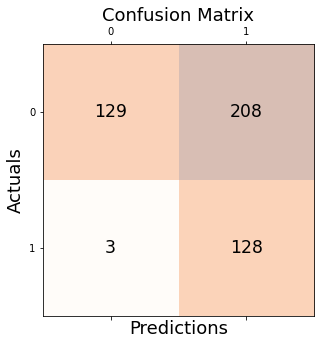

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=bnb1.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.381


In [ ]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.977


In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.549
